Import the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
# Supress all future warnings to keep the output clean
warnings.filterwarnings("ignore")

Load and Initial Data Exploration

In [3]:
# Load the dataset (using the file provided in the environment)
# The dataset cotains movie reviews and their corresponding sentiment (positive/negative)
try:
    df = pd.read_csv("imdb.csv")
except FileNotFoundError:
    print("Error: 'imdb.csv' was not found. Please ensure the file is accessible")
    exit()

In [4]:
# Display the Data Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


===== Target Distribution (Sentiment) Before Training =====
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


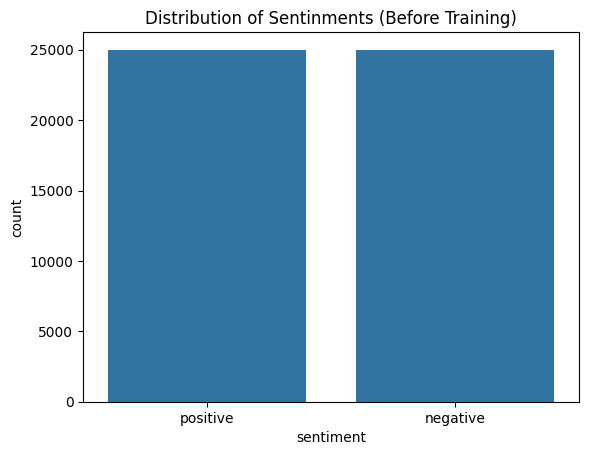

In [8]:
# Check the distribution of the target variable (sentiment)
# This is cruical to identify if the dataset is balanced or imbalanced
print("===== Target Distribution (Sentiment) Before Training =====")
print(df["sentiment"].value_counts())
plt.Figure(figsize=(6,4))
sns.countplot(x="sentiment",data=df)
plt.title("Distribution of Sentinments (Before Training)")
plt.show() # Visualization: Before Training -  Target Distribution

Data Preprocessing

In [15]:
# Number of elemnents in the data
print("===== Number of Elements =====")
len(df)

===== Number of Elements =====


50000

In [16]:
# Check for missing values
df_missing = df.isnull().sum()
print("===== Missing Values =====")
print(df_missing)

===== Missing Values =====
review       0
sentiment    0
dtype: int64


In [17]:
# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("===== Duplicated Rows =====")
print(df_duplicated)

===== Duplicated Rows =====
418


In [22]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

In [23]:
# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("===== Duplicated Rows =====")
print(df_duplicated)

===== Duplicated Rows =====
0


===== Target Distribution (Sentiment) Before Training =====
sentiment
positive    24884
negative    24698
Name: count, dtype: int64


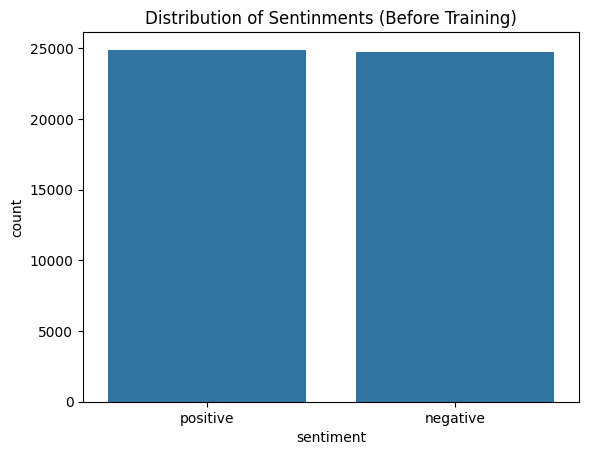

In [24]:
# Check the distribution of the target variable (sentiment)
# This is cruical to identify if the dataset is balanced or imbalanced
print("===== Target Distribution (Sentiment) Before Training =====")
print(df["sentiment"].value_counts())
plt.Figure(figsize=(6,4))
sns.countplot(x="sentiment",data=df)
plt.title("Distribution of Sentinments (Before Training)")
plt.show() # Visualization: Before Training -  Target Distribution

Data Encoding

In [25]:
# Encode the categorical target variable ("sentinment") into numerical format (0 and 1)
# "positive" -> 1, "Negative" -> 0
le = LabelEncoder()
df["sentiment_encoded"] = le.fit_transform(df["sentiment"])
# The classes are encoded are mapped: 0 is "negative", 1 is "positive"
print(f"Encoded Classes: {dict(zip(le.classes_,le.transform(le.classes_)))}")

Encoded Classes: {'negative': np.int64(0), 'positive': np.int64(1)}


Feature Engineering

In [26]:
#  Define features (X -the "review" text) and target (y - the "sentinment_encoded")
X = df["review"]
y = df["sentiment_encoded"]

Data Splitting

In [27]:
# Split the data into training and testing sets
# The test size is 20% (random_state=42 ensures reproducibily)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Model Pipeline Setup and Comparison

In [28]:
# We will compare three common classification algorithms:
# 1. Logistic Regression (Simple, highly interpretable linear model)
# 2. Decision Tree (Non-linear,captures complex rules, but prone to overfitting)
# 3. Multinominal Naive Bayes (Probabilistic, excellent for text classification due to TF-IDF features)

# A Pipeline is used to chain the preprocessing step (TF-IDF Vectorization) and the classifier
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into a numerical feature matrix
# It assigns a weight to each word based on its frequency in a document relative to its frequency across all documents

pipelines = {
    "LogisticRegression":Pipeline([
        ("tfidf",TfidfVectorizer(stop_words="english")),
        ("clf",LogisticRegression(random_state=42))
    ]),
    "DecisionTree":Pipeline([
        ("tfidf",TfidfVectorizer(stop_words="english")),
        ("clf",DecisionTreeClassifier(random_state=42))
    ]),
    "MultinomialNB":Pipeline([
        ("tfidf",TfidfVectorizer(stop_words="english")),
        ("clf",MultinomialNB())
    ])
}

In [29]:
# Dictionary to store performance metris for comparison
results = {}

----- Initial Model Training and Evaluation (Before Tuning) -----
Training LogisticRegression......
LogisticRegression Accuracy: 0.8925
              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      4939
    positive       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



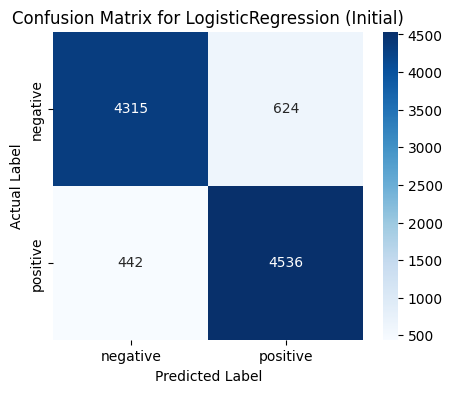

Training DecisionTree......
DecisionTree Accuracy: 0.7134
              precision    recall  f1-score   support

    negative       0.71      0.71      0.71      4939
    positive       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917



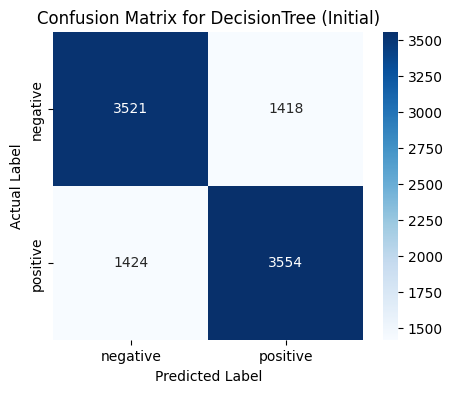

Training MultinomialNB......
MultinomialNB Accuracy: 0.8638
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      4939
    positive       0.87      0.86      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



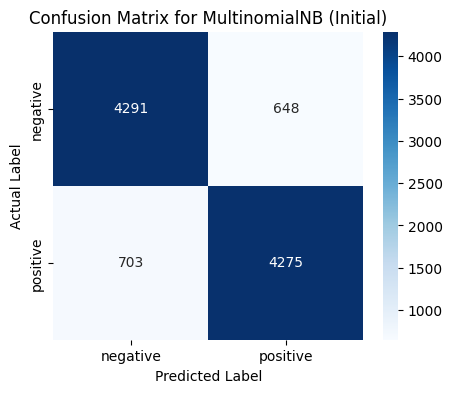

In [30]:
# Iterate through each pipeline,train the model and evaluate its performance
print("----- Initial Model Training and Evaluation (Before Tuning) -----")
for name,pipeline in pipelines.items():
    print(f"Training {name}......")

    # Train the pipeline: Vectorization and classification are done in one step
    pipeline.fit(X_train,y_train)

    # Predict the target on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_test,y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")
    # Show the full classification report (precison,recall,f1-score)
    print(classification_report(y_test,y_pred,target_names=["negative","positive"]))

    # Visualization: Confusion Matrix for initial models
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
                xticklabels=["negative","positive"],
                yticklabels=["negative","positive"])
    plt.title(f"Confusion Matrix for {name} (Initial)")
    plt.ylabel("Actual Label")
    plt.xlabel("Predicted Label")
    plt.show() # Visualization: Initial Confusion Matrix

Hyperparameter Tuning for Logistic Regression

In [41]:
# Defin the parameter grid for Logistic Regression
# "tfidf__ngram_range": The range of word combinations to use (e.g, single words, or pairs of words)
# "clf__C": Inverse of regularization strength (smaller values specify stronger regularization)
param_grid_lr = {
    "tfidf__ngram_range":[(1,1),(1,2)],  # Unigrams (1,1) or Unigrams and Biagrams (1,2)
    "clf__C":[0.1,1,10],  # Regularization strength C
    "clf__solver":["liblinear"]
}

In [42]:
#  Create a new pipeline for tuning
lr_pipeline = Pipeline([
    ("tfidf",TfidfVectorizer(stop_words="english")),
    ("clf",LogisticRegression(random_state=42,max_iter=1000)) # Increased max_iter for convergence
])

In [43]:
# Setup GridSearchCV with 3-fold cross-valiadtion
grid_search_lr = GridSearchCV(lr_pipeline,param_grid_lr,cv=3,verbose=3,n_jobs=-1,scoring="accuracy")

In [44]:
# Execute the grid search on the training data
grid_search_lr.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'clf__C': [0.1, 1, ...], 'clf__solver': ['liblinear'], 'tfidf__ngram_range': [(1, ...), (1, ...)]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [45]:
# Store the best model and its score
best_lr_model = grid_search_lr.best_estimator_
best_lr_score = grid_search_lr.best_score_

In [46]:
print(f"Best Cross-validation Accuracy (Logistic Regression): {best_lr_score:.4f}")
print(f"Best Parameters Found: {grid_search_lr.best_params_}")

Best Cross-validation Accuracy (Logistic Regression): 0.8965
Best Parameters Found: {'clf__C': 10, 'clf__solver': 'liblinear', 'tfidf__ngram_range': (1, 2)}


Final Evaluation of Tuned Model

In [47]:
# Evaluate the best model on the unseen test data
y_pred_tuned = best_lr_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test,y_pred_tuned)

print("----- Final Evauation of Hyperparameter-Tuned Logistic Regression -----")
print(f"Tuned Logistic Regression Test Accuracy: {tuned_accuracy:.4f}")
print(classification_report(y_test,y_pred_tuned,target_names=["negative","positive"]))

----- Final Evauation of Hyperparameter-Tuned Logistic Regression -----
Tuned Logistic Regression Test Accuracy: 0.8999
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4939
    positive       0.89      0.92      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



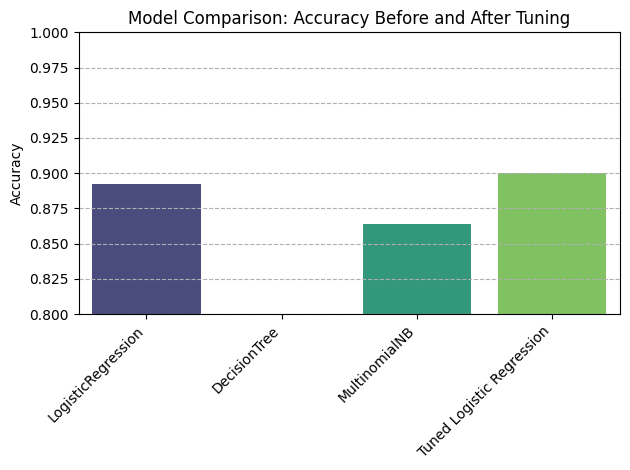

In [48]:
# Visualization: Final Comparison of Model Accuracies
results['Tuned Logistic Regression'] = tuned_accuracy

plt.Figure(figsize=(10,6))
model_names = list(results.keys())
accuracies = list(results.values())
sns.barplot(x=model_names,y=accuracies,palette="viridis")
plt.ylim(0.8,1.0) # Set reasonable limits for classification accuracy
plt.title("Model Comparison: Accuracy Before and After Tuning")
plt.ylabel("Accuracy")
plt.xticks(rotation=45,ha="right")
plt.grid(axis="y",linestyle="--")
plt.tight_layout()
plt.show() # Visualization After Training - Model Comparison

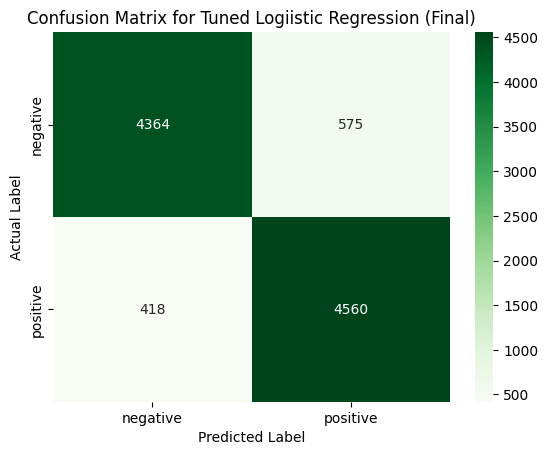

In [49]:
# Visualization: Confusion Matrix for the final best model
cm_tuned = confusion_matrix(y_test,y_pred_tuned)
plt.Figure(figsize=(5,4))
sns.heatmap(cm_tuned,annot=True,fmt="d",cmap="Greens",
            xticklabels=["negative","positive"],
            yticklabels=["negative","positive"])
plt.title("Confusion Matrix for Tuned Logiistic Regression (Final)")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show() # Visualization: Final Tuned Confusion Matrix

Function for New Prediction

In [50]:
# Define a function to take a new review and predict its sentiment using the best model
def predict_new_review(model):
    print("----- New Prediction Input -----")
    print("Enter a movie review to predict its sentiment (type 'exit' to quit):")

    while True:
        # Get user input for a new review
        new_review = input("Your Review:")
        if new_review.lower() == "exit":
            break
        if not new_review.strip():
            print("Please enter a non-empty review.")
            continue

        # Predict the sentinment. The model handles the TF-IDF vectorization automatically.
        prediction_encoded = model.predict([new_review])[0]

        # Convert the numerical prediction back to the original label (positive or negative)
        prediction_label = le.inverse_transform([prediction_encoded])[0]

        # Get the probability (confidence score) of the prediction
        # The probabiliity of the predicted class is [:,predicted_encoded]
        # [0] is used because we only pass one review
        prediction_proba = model.predict_proba([new_review])[0][prediction_encoded]

        print(f"Predicted Sentinment: {prediction_label.upper()}")
        print(f"Confidence Score: {prediction_proba:.4f}")


# Run the prediction function with best-tuned model
predict_new_review(best_lr_model)

----- New Prediction Input -----
Enter a movie review to predict its sentiment (type 'exit' to quit):
Predicted Sentinment: NEGATIVE
Confidence Score: 0.9999
Predicted Sentinment: NEGATIVE
Confidence Score: 0.8770
Predicted Sentinment: NEGATIVE
Confidence Score: 0.5123
Predicted Sentinment: NEGATIVE
Confidence Score: 1.0000
Predicted Sentinment: POSITIVE
Confidence Score: 0.9972
Predicted Sentinment: POSITIVE
Confidence Score: 0.9987
Please enter a non-empty review.
Please enter a non-empty review.
